# MINIS画像認識

**kaggleのMINIST画像データを活用して、画像認識を実施する**

**インポートした画像データ認識を実施する**

**CNNを活用して画像認識を実施する**

**ライブラリは、tensorflowを活用**


Extracting ../data/train-images-idx3-ubyte.gz
Extracting ../data/train-labels-idx1-ubyte.gz
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz
データ読み込み完了
Generation: 10. 正解率 = 0.19
Generation: 20. 正解率 = 0.5
Generation: 30. 正解率 = 0.69
Generation: 40. 正解率 = 0.77
Generation: 50. 正解率 = 0.74
Generation: 60. 正解率 = 0.83
Generation: 70. 正解率 = 0.83
Generation: 80. 正解率 = 0.81
Generation: 90. 正解率 = 0.91
Generation: 100. 正解率 = 0.82
Generation: 110. 正解率 = 0.86
Generation: 120. 正解率 = 0.85
Generation: 130. 正解率 = 0.82
Generation: 140. 正解率 = 0.9
Generation: 150. 正解率 = 0.89
Generation: 160. 正解率 = 0.89
Generation: 170. 正解率 = 0.89
Generation: 180. 正解率 = 0.94
Generation: 190. 正解率 = 0.89
Generation: 200. 正解率 = 0.89
Generation: 210. 正解率 = 0.92
Generation: 220. 正解率 = 0.91
Generation: 230. 正解率 = 0.96
Generation: 240. 正解率 = 0.94
Generation: 250. 正解率 = 0.92
Generation: 260. 正解率 = 0.87
Generation: 270. 正解率 = 0.95
Generation: 280. 正解率 = 0.95
Generation: 290. 正解率 = 0.91
Generat

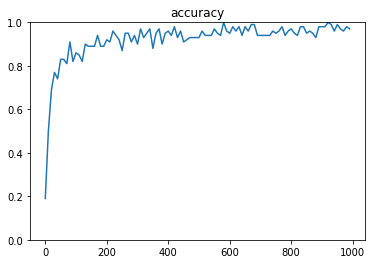

In [5]:
import sys, os
sys.path.append(os.pardir)
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

iters_num = 1000
batch_size = 100
plot_interval = 10

dropout_rate = 0.5

# データの読み込み
mnist = input_data.read_data_sets("../data/", one_hot=True)

print("データ読み込み完了")

# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()                